In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [91]:
1e3

1000.0

In [92]:
df = pd.read_csv('./water_usage.csv')
df.drop(['unit'], axis=1, inplace=True)
df.head()
A = np.sum(df['Total'])/1e3
lamb = 0.1

df_elec = pd.read_csv('./elec_usage.csv')
B = np.sum(df_elec['Elec Consumption(in billion kwh)'])


In [93]:
elec = eval("""[3933.683204
3577.119783
3566.349395
3335.213361
3299.099057
3468.3302
3401.3622
3840.8015
3614.9732
3581.9664
3591.23499
3481.2981
3179.3055
3180.7328
3577.755
3707.779
3638.8383
3603.821
3466.0974
3155.0505
2729.5634]""".replace('\n', ', '))

waterG = eval("""[19205972
15789278
12528080
9947324
10551848
11843066
11984066
13053619
14510100
14713748
15623871
14747787
11365805
11211927
11907776
12231654
13506530
12181562
11563633
11774078
8173542]""".replace('\n', ', '))

levelG = eval("""[3665.32
3637.85
3607.89
3579.88
3585.86
3600.83
3602.38
3612.42
3626.56
3628.63
3635.90 
3628.87
3595.83
3593.79
3610.47
3604.74
3616.94
3604.11
3596.95
3600.11
3557.57]""".replace('\n', ', '))

waterH = eval("""[20935774
18037362
16037336
14541211
15381733
14530987
13137092
12464762
11489247
10759249
12077029
13798396
12705639
10940605
10071257
9784790
10267537
10144058
10469995
10758113
9532500]""".replace('\n', ', '))

levelH = eval("""[1185.78
1163.17
1145.93
1131.76
1139.87
1131.66
1118
1109.64
1099.72
1091.56
1106.12
1121.91
1110.9
1090.76
1080.68
1077.22
1083.06
1081.57
1085.46
1088.78
1074.01]""".replace('\n', ', '))

elec = np.array(elec)
elec = elec / 1e2

def water_convert(water):
    water = np.array(water)
    water = water * 325846.885 / 1e9
    return water

waterG = water_convert(waterG)
print(waterG)

waterH = water_convert(waterH)
print(waterH)

[6258.2061496  5144.8870527  4082.23584303 3241.30453949 3438.28680179
 3859.02616495 3904.97057573 4253.48108913 4728.07088604 4794.42895247
 5090.98969699 4805.52045459 3703.51215477 3653.3714878  3880.11171688
 3985.6463543  4401.06072766 3969.32403213 3767.97379233 3836.54664005
 2663.32320012]
[6821.85674296 5877.41822132 5225.7159793  4738.20830848 5012.08978395
 4734.87684993 4280.68050616 4061.60386997 3743.73534595 3505.86777159
 3935.2622797  4496.1643546  4140.09289008 3564.96205927 3281.68772148
 3188.34334188 3345.64494807 3305.40970056 3411.61525672 3505.49760953
 3106.13543126]


C:\Users\Sycamore\AppData\Local\Temp\ipykernel_6936\1519149261.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(df['waterG'][:,np.newaxis], df['elec'][:,np.newaxis])


LinearRegression()

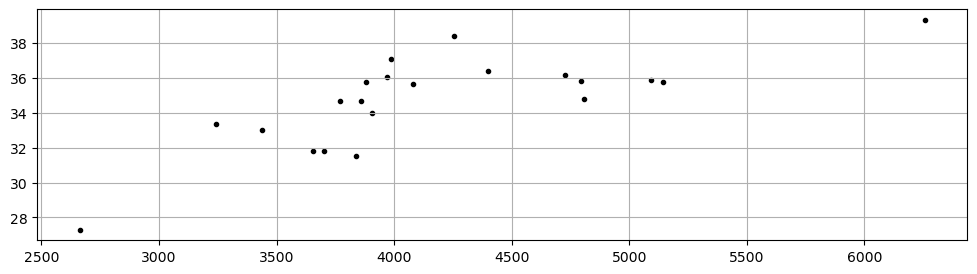

In [94]:
df = pd.DataFrame(elec, columns=['elec'])
df['waterG'] = waterG
fig = plt.figure(figsize =(12,3))
plt.scatter(df['waterG'],df['elec'],marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
model = linear_model.LinearRegression()
model.fit(df['waterG'][:,np.newaxis], df['elec'][:,np.newaxis])

In [95]:
print('slope: %.4f' % model.coef_[0])
print('intercept: %.4f' % model.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %
      (model.coef_[0], model.intercept_))

slope: 0.0025
intercept: 24.1174
The linear regression function: y = 0.0025x + 24.1174


In [96]:
### here mu is the slope
mu = model.coef_[0]
### K = B/mu
K = B / mu / 365


In [97]:
print("All the parameters are:")
print("A = ", A, "with the unit of billion gallons per day")
print("B = ", B, "with the unit of billion kwh")
print("lambda = ", lamb)
print("K = ", K, "with the unit of billion gallons")
print("mu = ", mu)

All the parameters are:
A =  44.26947 with the unit of billion gallons per day
B =  1191.00234464 with the unit of billion kwh
lambda =  0.1
K =  [1280.70418097] with the unit of billion gallons
mu =  [0.00254783]


C:\Users\Sycamore\AppData\Local\Temp\ipykernel_6936\2274953697.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelG2waterG.fit(df2['levelG'][:,np.newaxis], df2['waterG'][:,np.newaxis])


LinearRegression()

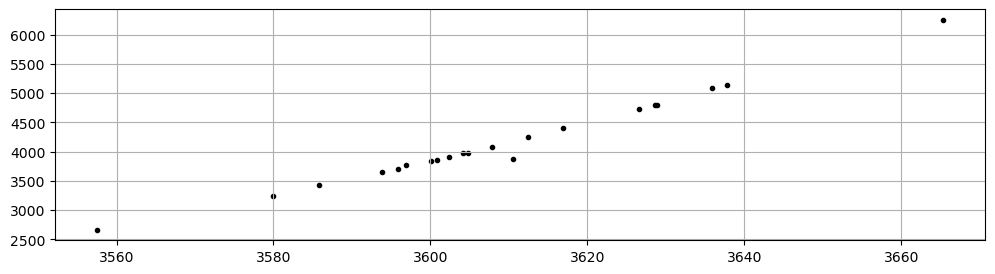

In [98]:
# water = a * level + b
df2 = pd.DataFrame(levelG, columns=['levelG'])
df2['waterG'] = waterG
fig = plt.figure(figsize =(12,3))
plt.scatter(df2['levelG'],df2['waterG'],marker = '.',color = 'k')
plt.grid(True)

levelG2waterG = linear_model.LinearRegression()
levelG2waterG.fit(df2['levelG'][:,np.newaxis], df2['waterG'][:,np.newaxis])

In [99]:
print('slope: %.4f' % levelG2waterG.coef_[0])
print('intercept: %.4f' % levelG2waterG.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

slope: 33.2906
intercept: -115987.1261
The linear regression function: y = 33.2906x + -115987.1261
